In [1]:
%%bash

module purge
module load unstable python-dev py-bluepy py-bluepysnap

source ${PYTHON_VENV_PATH}/bin/activate

Autoloading python/3.9.7
Autoloading hpe-mpi/2.25.hmpt


In [2]:
import sys

sys.path.append("./python-venv/lib/python3.9/site-packages")

In [3]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from bluepysnap import Simulation as SnapSimulation

snap_sim = SnapSimulation("./ngv.json")

In [5]:
print(
    snap_sim.time_start,
    snap_sim.time_stop,
    snap_sim.dt,
    # snap_sim.config,
    snap_sim.circuit,
)

0 2000.0 0.025 <bluepysnap.circuit.Circuit object at 0x7fff88864940>


In [6]:
print(snap_sim.reports)

{'voltage': <bluepysnap.frame_report.SomaReport object at 0x7fff888643a0>, 'NaCurrCompSum': <bluepysnap.frame_report.SomaReport object at 0x7fff88864f70>, 'NaConcAllCmps': <bluepysnap.frame_report.SomaReport object at 0x7fff88878040>, 'ATPConcAllCmps': <bluepysnap.frame_report.SomaReport object at 0x7fff88878940>}


In [7]:
snap_report_voltage = snap_sim.reports["voltage"]
snap_report_ATPConcAllCmps = snap_sim.reports["ATPConcAllCmps"]

print(snap_report_voltage.population_names)

['All']


In [8]:
filtered_voltage = snap_report_voltage.filter()
filtered_ATPConcAllCmps = snap_report_ATPConcAllCmps.filter()

data_voltage = filtered_voltage.report
data_ATPConcAllCmps = filtered_ATPConcAllCmps.report

In [9]:
data_voltage = np.array(data_voltage)
print(
    f"data_voltage : mean={data_voltage.mean()}, min={data_voltage.min()}, max={data_voltage.max()}"
)

data_voltage : mean=-79.38700103759766, min=-88.0240707397461, max=29.160173416137695


In [10]:
data_ATPConcAllCmps = np.array(data_ATPConcAllCmps)
print(
    f"data_ATPConcAllCmps : mean={data_ATPConcAllCmps.mean()}, min={data_ATPConcAllCmps.min()}, max={data_ATPConcAllCmps.max()}"
)

data_ATPConcAllCmps : mean=1.5318151712417603, min=1.221185326576233, max=2.1999993324279785


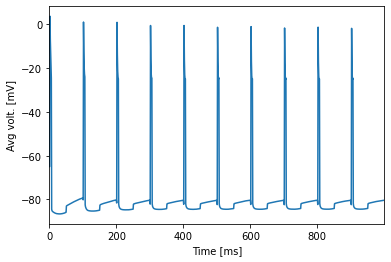

In [11]:
filtered_voltage.trace()
plt.savefig("./RESULTS/voltage_trace.pdf")

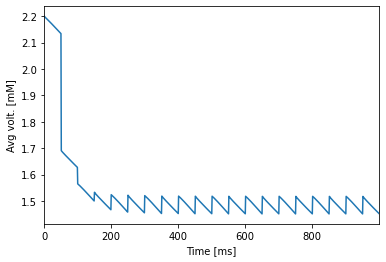

In [12]:
filtered_ATPConcAllCmps.trace()
plt.savefig("./RESULTS/ATPConcAllCmps_trace.pdf")

In [13]:
snap_report_voltage_pop = snap_report_voltage["All"]
snap_report_ATPConcAllCmps_pop = snap_report_ATPConcAllCmps["All"]

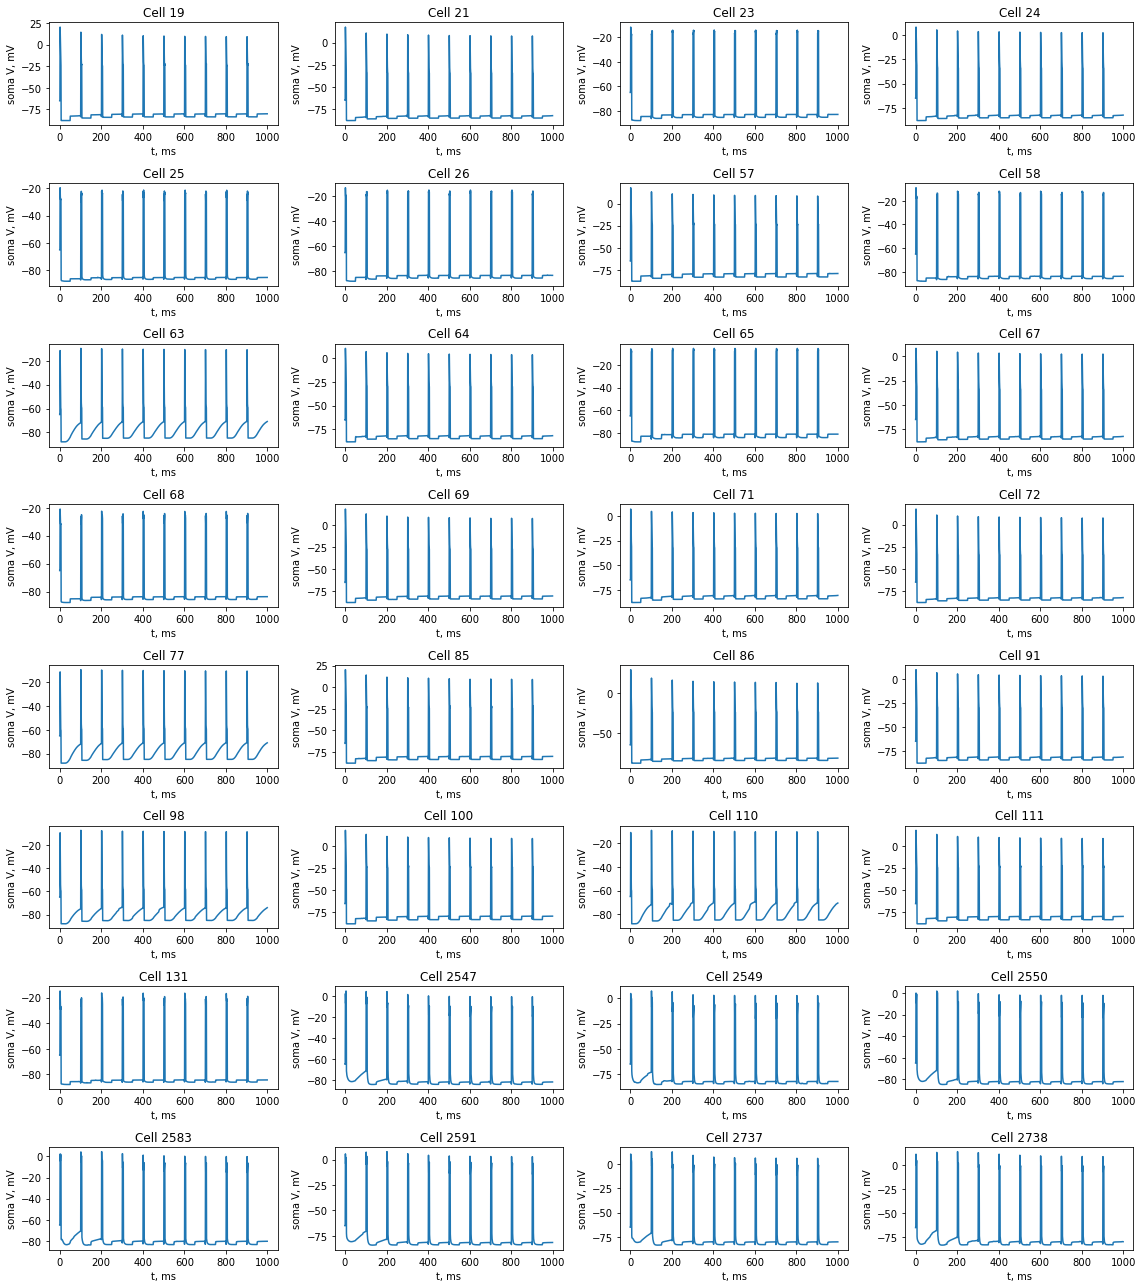

In [14]:
fig, axs = plt.subplots(8, 4, figsize=(16, 18))

for c, id in enumerate(snap_report_voltage_pop.node_ids):
    x = c % 4
    y = c // 4
    axs[y, x].plot(
        snap_report_voltage_pop.get(
            group=snap_report_voltage_pop.node_ids[c],
            t_start=snap_sim.time_start,
            t_stop=snap_sim.time_stop,
        )
    )
    axs[y, x].set_title(f"Cell {id}")

for ax in axs.flat:
    ax.set(xlabel="t, ms", ylabel="soma V, mV")

fig.tight_layout()

plt.savefig("./RESULTS/voltages.pdf")

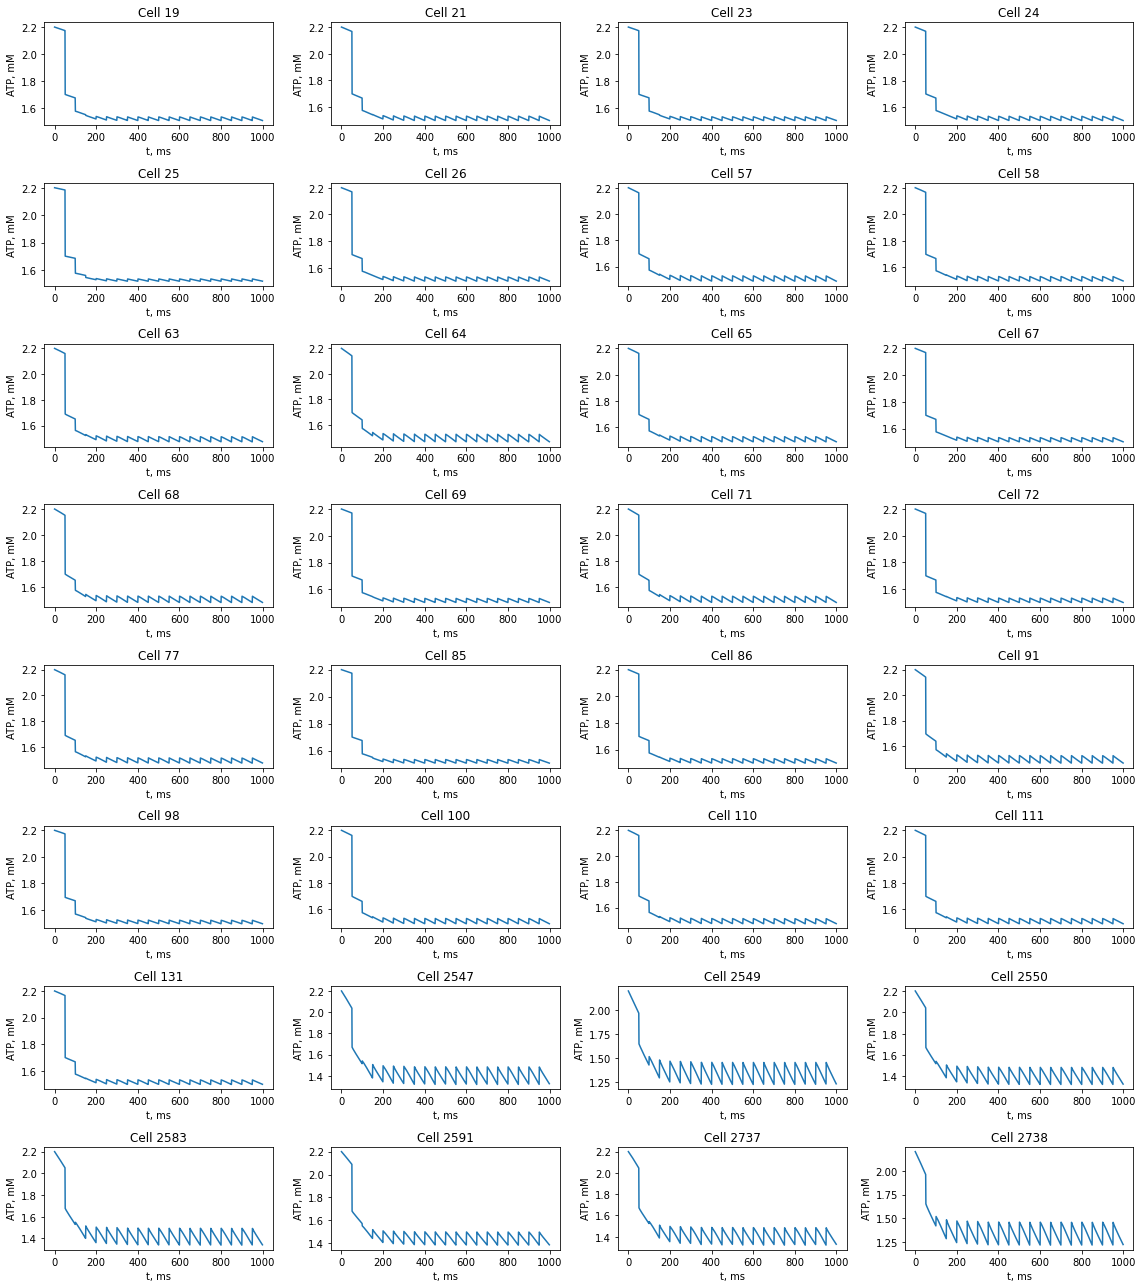

In [15]:
fig, axs = plt.subplots(8, 4, figsize=(16, 18))

for c, id in enumerate(snap_report_ATPConcAllCmps_pop.node_ids):
    x = c % 4
    y = c // 4
    axs[y, x].plot(
        snap_report_ATPConcAllCmps_pop.get(
            group=snap_report_ATPConcAllCmps_pop.node_ids[c],
            t_start=snap_sim.time_start,
            t_stop=snap_sim.time_stop,
        )
    )
    axs[y, x].set_title(f"Cell {id}")

for ax in axs.flat:
    ax.set(xlabel="t, ms", ylabel="ATP, mM")

fig.tight_layout()

plt.savefig("./RESULTS/ATPConc.pdf")